# Search-coil Magnetometer (SCM)

This notebook shows how to load and plot MMS SCM data with pySPEDAS and pyTplot

For information on the data, please see the Data Products Guide at:

https://lasp.colorado.edu/mms/sdc/public/datasets/fields/

This command sets up the PySPEDAS environment when running in Google Colab.  You can skip it or comment it out if you're running this notebook in an environment that already has PySPEDAS installed.

In [ ]:
!pip install pyspedas

## Get started

To get started, import the `scm` function from the `pyspedas.projects.mms` module, and `tplot` from `pyspedas`

In [ ]:
from pyspedas.projects.mms import scm
from pyspedas import tplot
from pyspedas import tdpwrspc

Select SATNAME ('1','2','3', or '4')

In [2]:
satname = '4'

Select data rate ('srvy' or 'brst')

In [3]:
scm_data_rate = 'srvy' # or 'brst'

Select mode ('scsrvy' for survey data rate (both slow and fast have 32 S/s), 'scb' (8192 S/s) or 'schb' (16384 S/s) for burst data rate)

In [4]:
scm_datatype = 'scsrvy' # or 'scb'

In [5]:
scm_name = 'mms'+satname+'_scm_acb_gse_'+scm_datatype+'_'+scm_data_rate+'_l2'

## Load the survey mode SCM data

In [6]:
scm_vars = scm(trange=['2015-10-16', '2015-10-16/3:00'], probe=satname, time_clip=True)

11-Dec-23 08:41:28: Downloading mms4_scm_srvy_l2_scsrvy_20151016_v2.2.3.cdf to pydata/mms4/scm/srvy/l2/scsrvy/2015/10
11-Dec-23 08:42:09: Time clip was applied to: mms4_scm_acb_gse_scsrvy_srvy_l2
11-Dec-23 08:42:09: Loaded variables:
11-Dec-23 08:42:09: mms4_scm_acb_gse_scsrvy_srvy_l2


## Plot the survey mode data in GSE coordinates

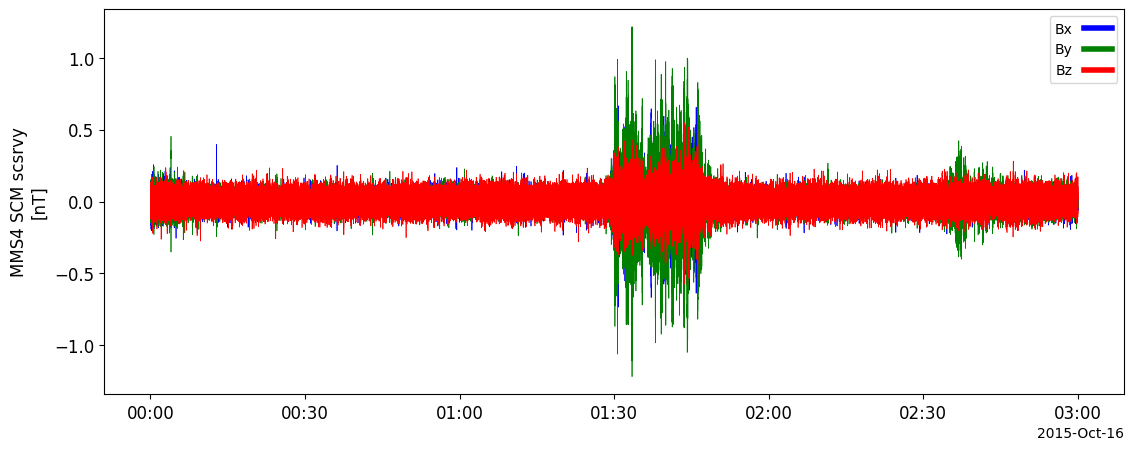

In [7]:
tplot(scm_name)

## Dynamic Power Spectra

Calculate the dynamic power spectra without overlapping nshiftpoints=nboxpoints

In [8]:
if scm_datatype == 'scb': 
    nboxpoints_input = 8192 
else:
    nboxpoints_input = 512

In [9]:
pwrspc_var = tdpwrspc(scm_name, nboxpoints=nboxpoints_input, nshiftpoints=nboxpoints_input, binsize=1)

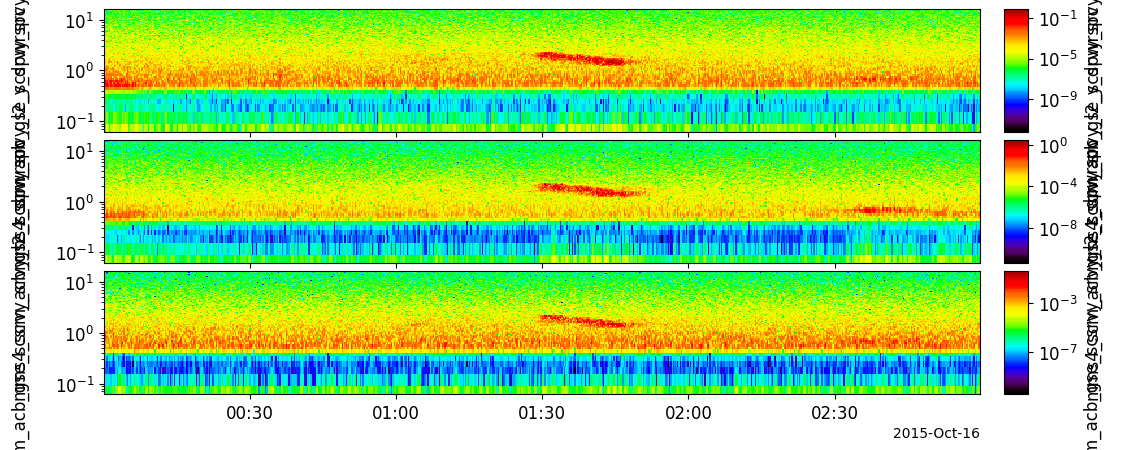

In [10]:
tplot(pwrspc_var)

## Load the burst mode data

In [11]:
burst_vars = scm(data_rate='brst', trange=['2015-10-16/13:06', '2015-10-16/13:07'])

11-Dec-23 08:42:20: Downloading mms1_scm_brst_l2_schb_20151016130524_v2.2.0.cdf to pydata/mms1/scm/brst/l2/schb/2015/10/16
11-Dec-23 08:42:31: Downloading mms1_scm_brst_l2_scb_20151016130524_v2.2.0.cdf to pydata/mms1/scm/brst/l2/scb/2015/10/16
11-Dec-23 08:42:49: Time clip was applied to: mms1_scm_acb_gse_scb_brst_l2
11-Dec-23 08:42:49: Time clip was applied to: mms1_scm_acb_gse_schb_brst_l2
11-Dec-23 08:42:49: Loaded variables:
11-Dec-23 08:42:49: mms1_scm_acb_gse_scb_brst_l2
11-Dec-23 08:42:49: mms1_scm_acb_gse_schb_brst_l2


## Plot the burst mode data in GSE coordinates

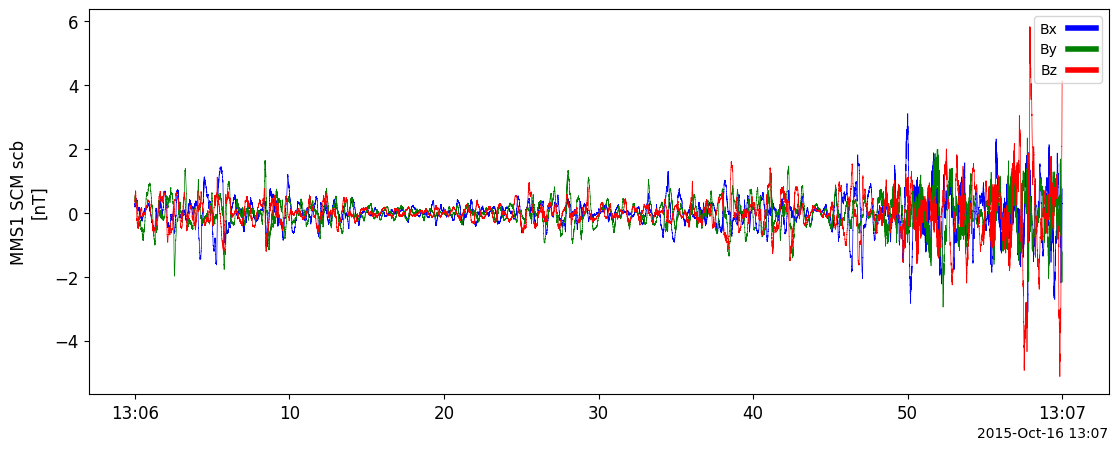

In [12]:
tplot('mms1_scm_acb_gse_scb_brst_l2')

In [13]:
print(pwrspc_var)


['mms4_scm_acb_gse_scsrvy_srvy_l2_x_dpwrspc', 'mms4_scm_acb_gse_scsrvy_srvy_l2_y_dpwrspc', 'mms4_scm_acb_gse_scsrvy_srvy_l2_z_dpwrspc']


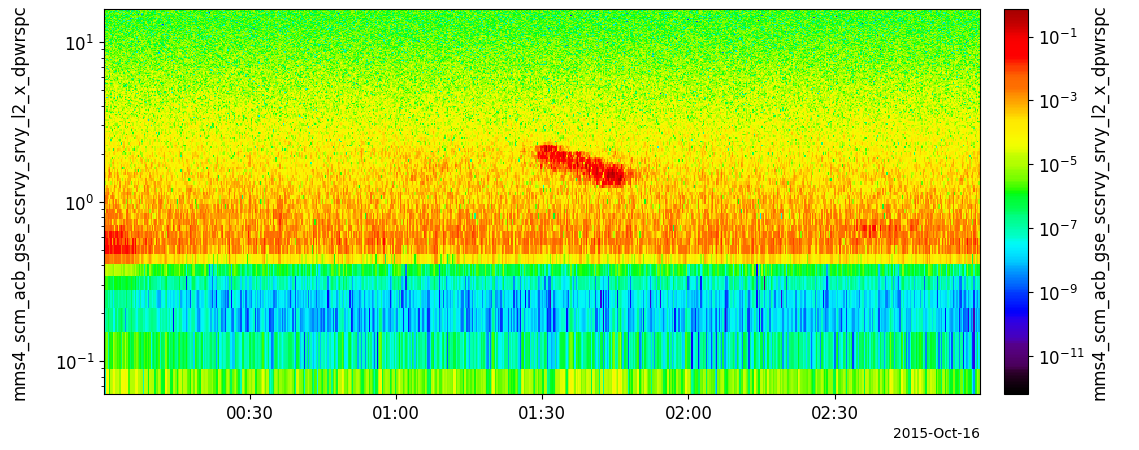

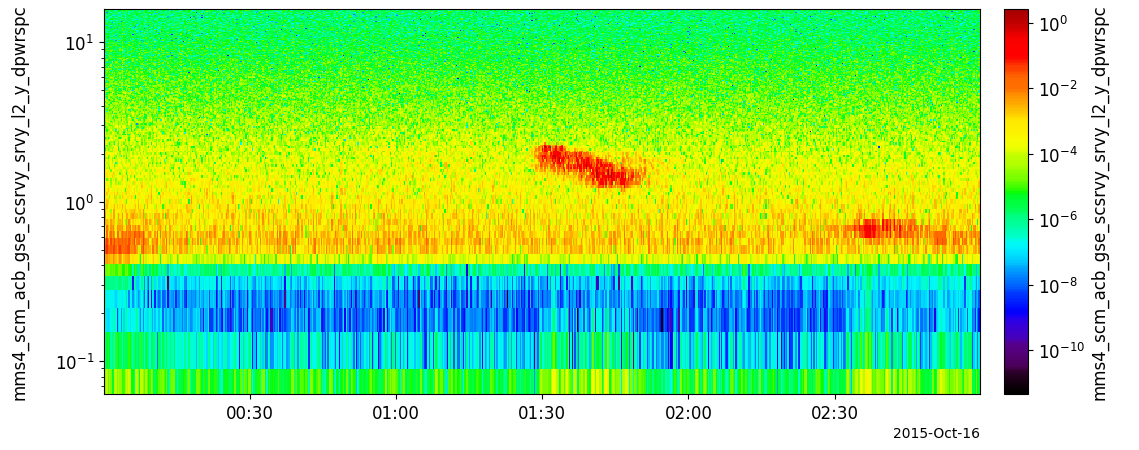

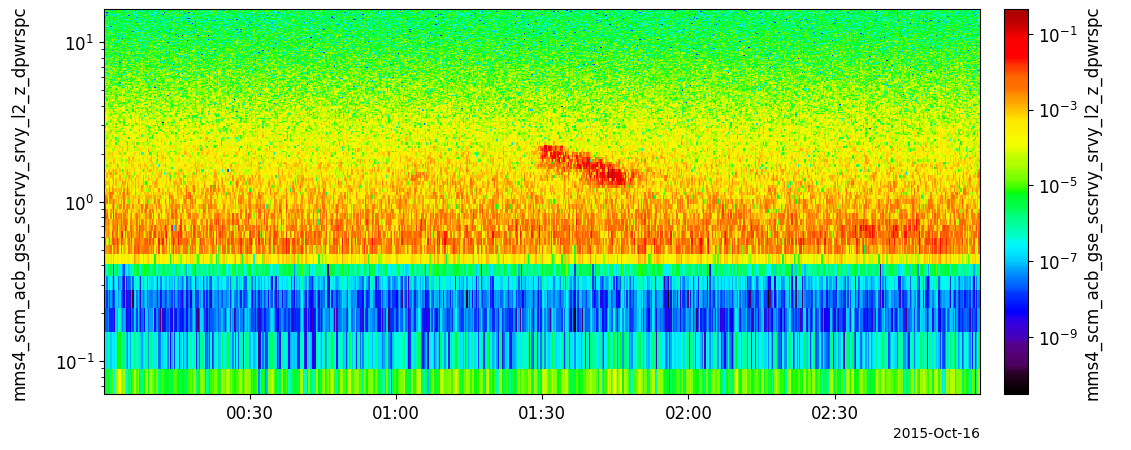

In [14]:
tplot(pwrspc_var[0])
tplot(pwrspc_var[1])
tplot(pwrspc_var[2])